In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
data=pd.read_csv(r'D:\Datasets\Loan Dataset.csv')

In [3]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [4]:
data=data.dropna()

In [5]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [6]:
data['Total_Income'] = data['ApplicantIncome'] + data['CoapplicantIncome']
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,9613.0


In [7]:
data=data.drop(columns='Loan_ID')

# Feature Engineering

In [8]:
data.replace({
    'Gender' : {'Male':1 ,'Female':0},
'Married' : {'Yes':1 ,'No':0},
'Dependents' : {'1':1 , '0':0 ,'2':2 ,'3+':3},
'Education' : {'Graduate':1 ,'Not Graduate':0,},
'Self_Employed' : {'No':0 ,'Yes':1},
'Property_Area' : {'Rural':3,'Urban':1 ,'Semiurban':2},
'Loan_Status' : {'N':0 ,'Y':1}
    
} ,inplace=True)

In [9]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,3,0,6091.0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1,3000.0
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1,4941.0
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1,6000.0
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,1,9613.0


# Outlier Detection

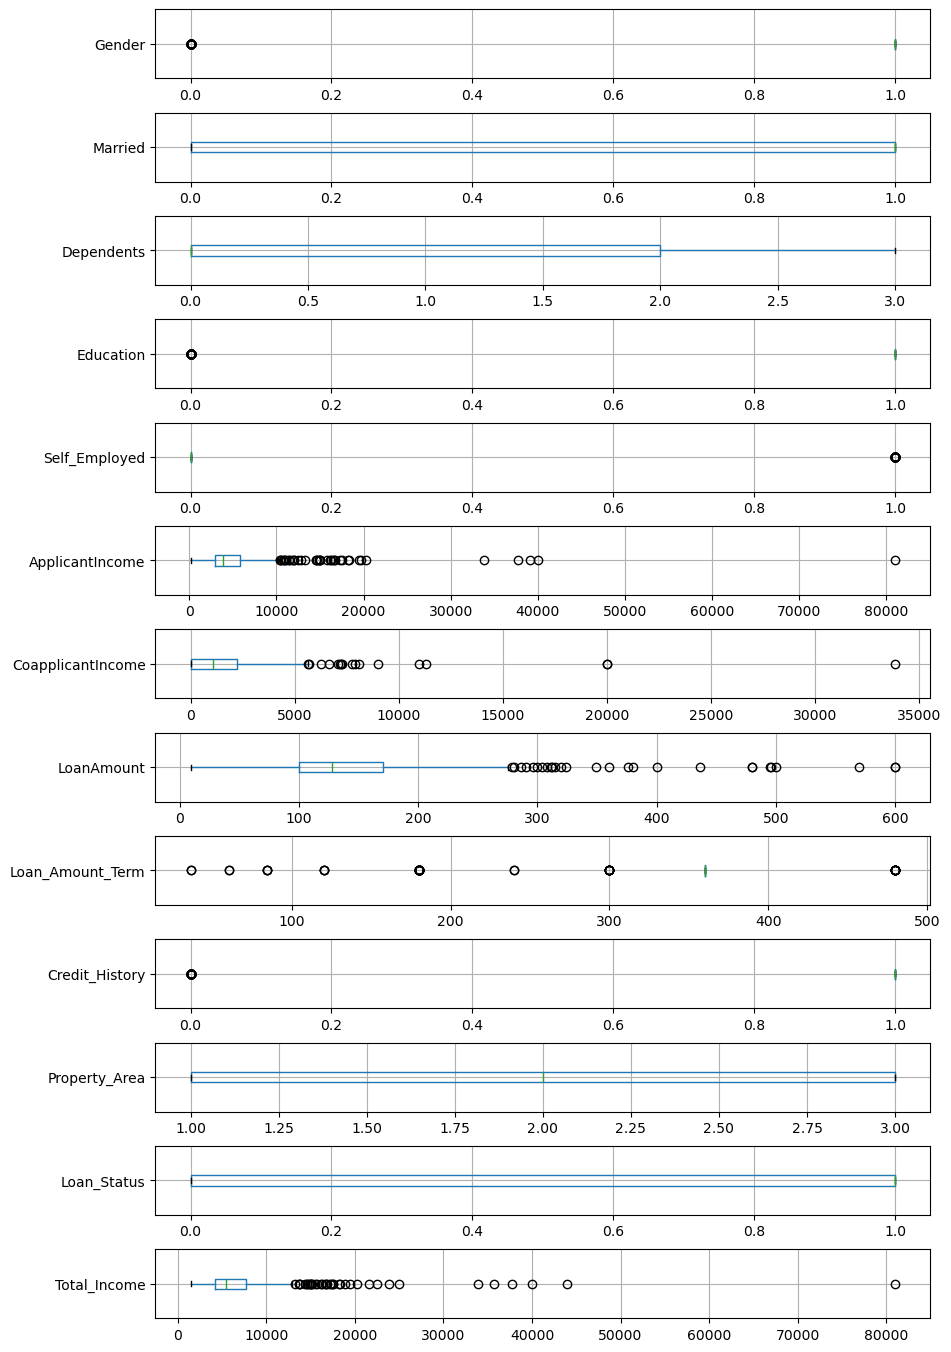

In [10]:
plt.figure(figsize=(10,17))
for i ,var in enumerate( data.columns):  
    plt.subplot(data.shape[1],1,i+1)
    data.boxplot([var],vert=False)
    plt.subplots_adjust(hspace=0.5)

In [11]:
olutlierf=data['ApplicantIncome']<30000
data=data[olutlierf]

In [12]:
ot=data['Total_Income']<30000
data=data[ot]

In [13]:
o=data['CoapplicantIncome']<15000
data=data[o]

In [14]:
l=data['LoanAmount']<550
data=data[l]

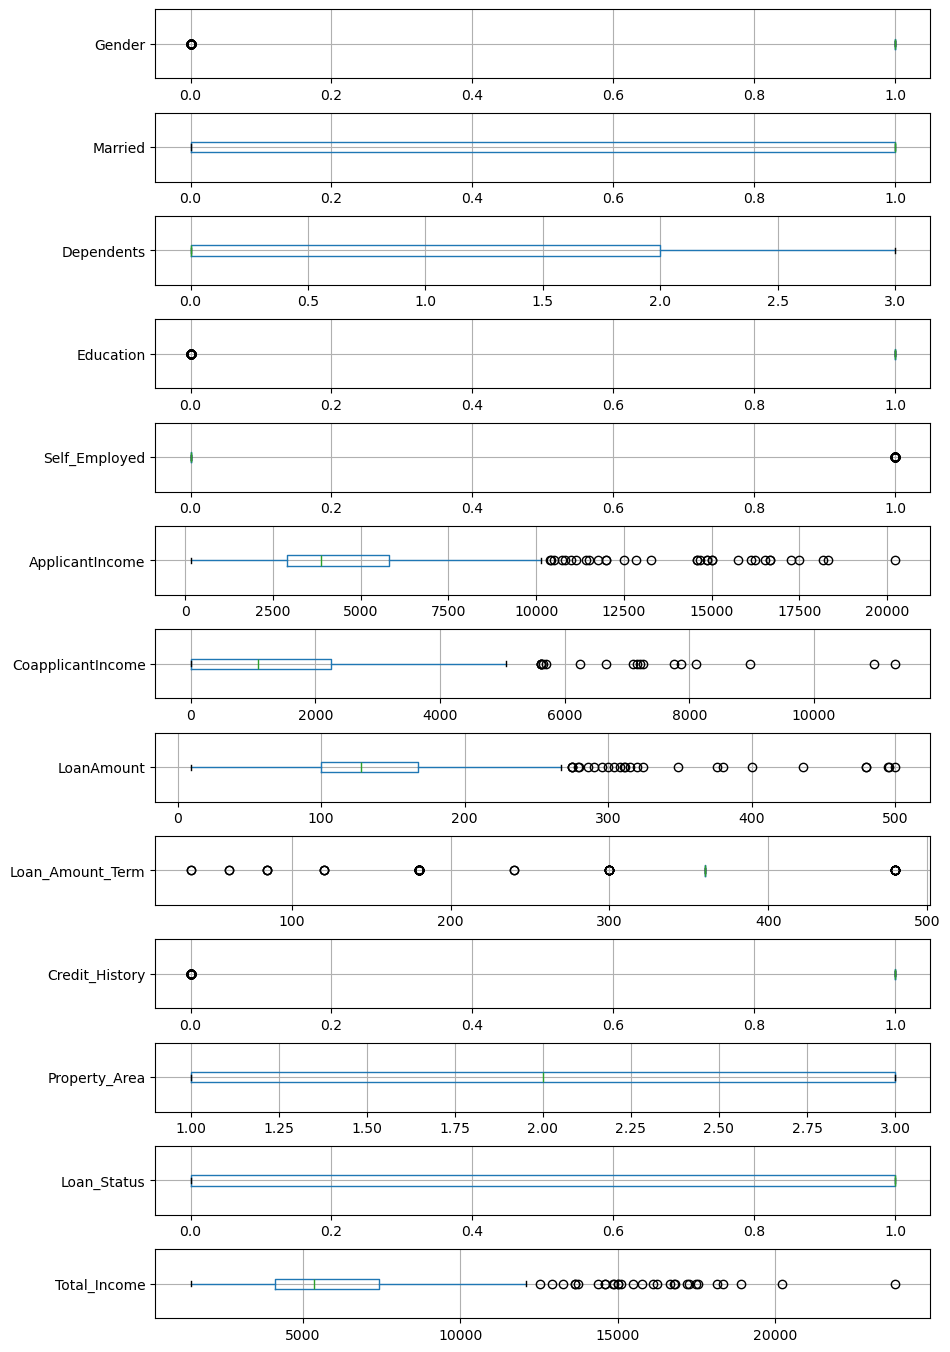

In [15]:
#Check
plt.figure(figsize=(10,17))
for i ,var in enumerate( data.columns):  
    plt.subplot(data.shape[1],1,i+1)
    data.boxplot([var],vert=False)
    plt.subplots_adjust(hspace=0.5)

In [16]:
numdata=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Total_Income']

In [17]:
numdata

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Total_Income']

In [18]:
#Checking skewness If 0 then normal, if 1 (positive skewed) then right skewed and if -1 (negative skewed) then left skewed 
data[numdata].skew()

ApplicantIncome      2.046998
CoapplicantIncome    1.789979
LoanAmount           1.927436
Total_Income         1.730744
dtype: float64

C:\Users\AM\AppData\Local\Temp\ipykernel_4108\1621729427.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[var])
C:\Users\AM\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\AM\AppData\Local\Temp\ipykernel_4108\1621729427.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot

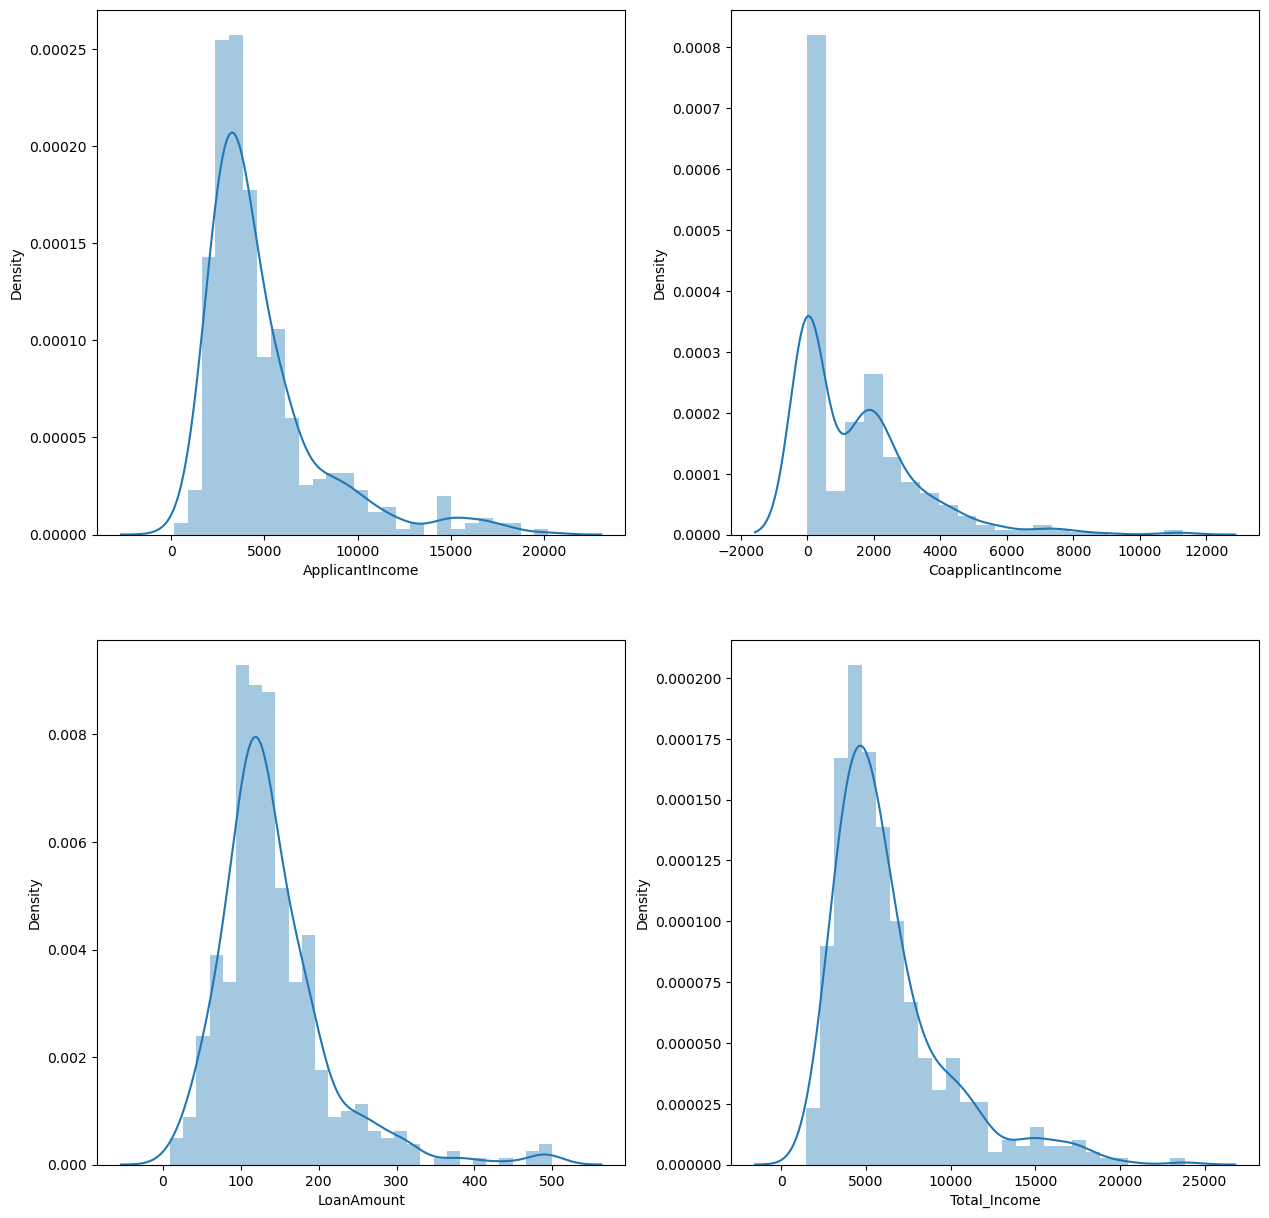

In [19]:
#checking Distribution
plt.figure(figsize=(15, 15))
for i,var in enumerate(numdata):
    plt.subplot(2,2,i+1)
    sns.distplot(data[var])
    
    

# Oversampling

In [20]:
#Random Over-sampling randomly selects instances from the minority class and replicates them to increase their representation in the dataset.
import imblearn
from imblearn.over_sampling import RandomOverSampler

In [21]:
data['Loan_Status'].value_counts()

Loan_Status
1    327
0    143
Name: count, dtype: int64

In [22]:
XX=data.drop('Loan_Status', axis=1)
YY=data['Loan_Status']

In [23]:
ab1=RandomOverSampler(random_state=42)
x1,y1=ab1.fit_resample(XX,YY)

In [24]:
x1.shape,y1.shape

((654, 12), (654,))

In [25]:
y1.value_counts()

Loan_Status
0    327
1    327
Name: count, dtype: int64

In [26]:
x1.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income
0,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,3,6091.0
1,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,3000.0


In [27]:
os_data=pd.concat([pd.DataFrame(x1),pd.Series(y1,name='Loan_Status')],axis=1)
os_data.shape

(654, 13)

# Skewness Transformation 

In [28]:
def skewcol(data, column_name):
    # Log Transform
    log_transformed = np.log(data[column_name])

    # Square Root Transform
    sqrt_transformed = np.sqrt(data[column_name])

    # Cube Root Transform
    cbrt_transformed = np.cbrt(data[column_name])

    # Calculate Skewness for each transformation
    original_skewness = data[column_name].skew()
    log_skewness = log_transformed.skew()
    sqrt_skewness = sqrt_transformed.skew()
    cbrt_skewness = cbrt_transformed.skew()

    # Display the skewness values
    print("Column name:- ",column_name)
    print("Original Data Skewness:", original_skewness)
    print("Log Transform Skewness:", log_skewness)
    print("Square Root Transform Skewness:", sqrt_skewness)
    print("Cube Root Transform Skewness:", cbrt_skewness)

In [29]:
os_data.skew()

Gender              -1.525171
Married             -0.479018
Dependents           1.044465
Education           -1.290447
Self_Employed        2.288986
ApplicantIncome      2.053661
CoapplicantIncome    1.847407
LoanAmount           1.918495
Loan_Amount_Term    -2.054975
Credit_History      -1.386349
Property_Area        0.038189
Total_Income         1.870499
Loan_Status          0.000000
dtype: float64

In [30]:
os_data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income,Loan_Status
0,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,3,6091.0,0
1,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,3000.0,1
2,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,4941.0,1
3,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,6000.0,1
4,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,9613.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
649,1,0,1,0,1,4053,2426.0,158.0,360.0,0.0,1,6479.0,0
650,0,0,0,1,0,3180,0.0,71.0,360.0,0.0,1,3180.0,0
651,1,1,1,1,0,12841,10968.0,349.0,360.0,1.0,2,23809.0,0
652,1,0,1,1,0,3062,1987.0,111.0,180.0,0.0,1,5049.0,0


<Axes: >

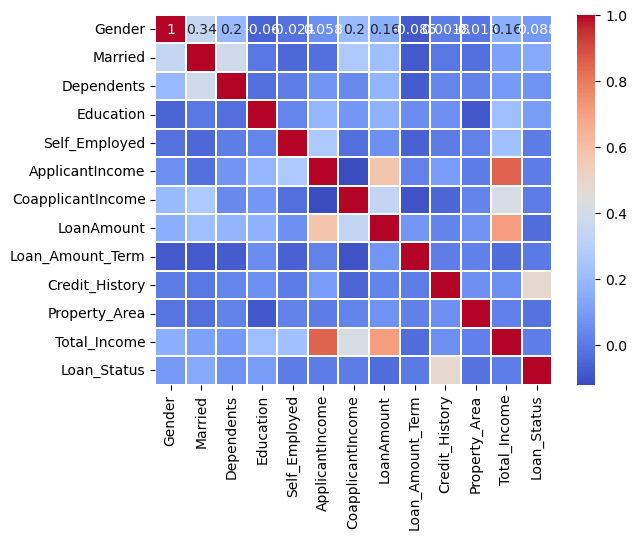

In [31]:
sns.heatmap(os_data.corr(),annot=True,linewidth=0.1,cmap='coolwarm')

In [32]:
for var in numdata:
    print(f'{skewcol(os_data,var)}\n\n')

Column name:-  ApplicantIncome
Original Data Skewness: 2.0536613234756085
Log Transform Skewness: -0.11965402033841417
Square Root Transform Skewness: 1.2138841860699299
Cube Root Transform Skewness: 0.8816952002371611
None


Column name:-  CoapplicantIncome
Original Data Skewness: 1.8474067817760076
Log Transform Skewness: nan
Square Root Transform Skewness: 0.3731146163814772
Cube Root Transform Skewness: 0.0893109327772241
None


Column name:-  LoanAmount
Original Data Skewness: 1.9184952046634356
Log Transform Skewness: -0.7780730423951205
Square Root Transform Skewness: 0.7278600376294743
Cube Root Transform Skewness: 0.29292728811683705
None


Column name:-  Total_Income
Original Data Skewness: 1.87049895858029
Log Transform Skewness: 0.3455367198732556
Square Root Transform Skewness: 1.089185808183311
Cube Root Transform Skewness: 0.8391705327029977
None




C:\Users\AM\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\AM\anaconda3\Lib\site-packages\pandas\core\nanops.py:1248: RuntimeWarning: invalid value encountered in subtract
  adjusted = values - mean


In [33]:
# Transformation
os_data['ApplicantIncome']=np.cbrt(os_data['ApplicantIncome'])
os_data['CoapplicantIncome']=np.cbrt(os_data['CoapplicantIncome'])
os_data['LoanAmount']=np.cbrt(os_data['LoanAmount'])
os_data['Total_Income']=np.log(os_data['Total_Income'])


C:\Users\AM\AppData\Local\Temp\ipykernel_4108\2981943817.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(os_data[var])
C:\Users\AM\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\AM\AppData\Local\Temp\ipykernel_4108\2981943817.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histp

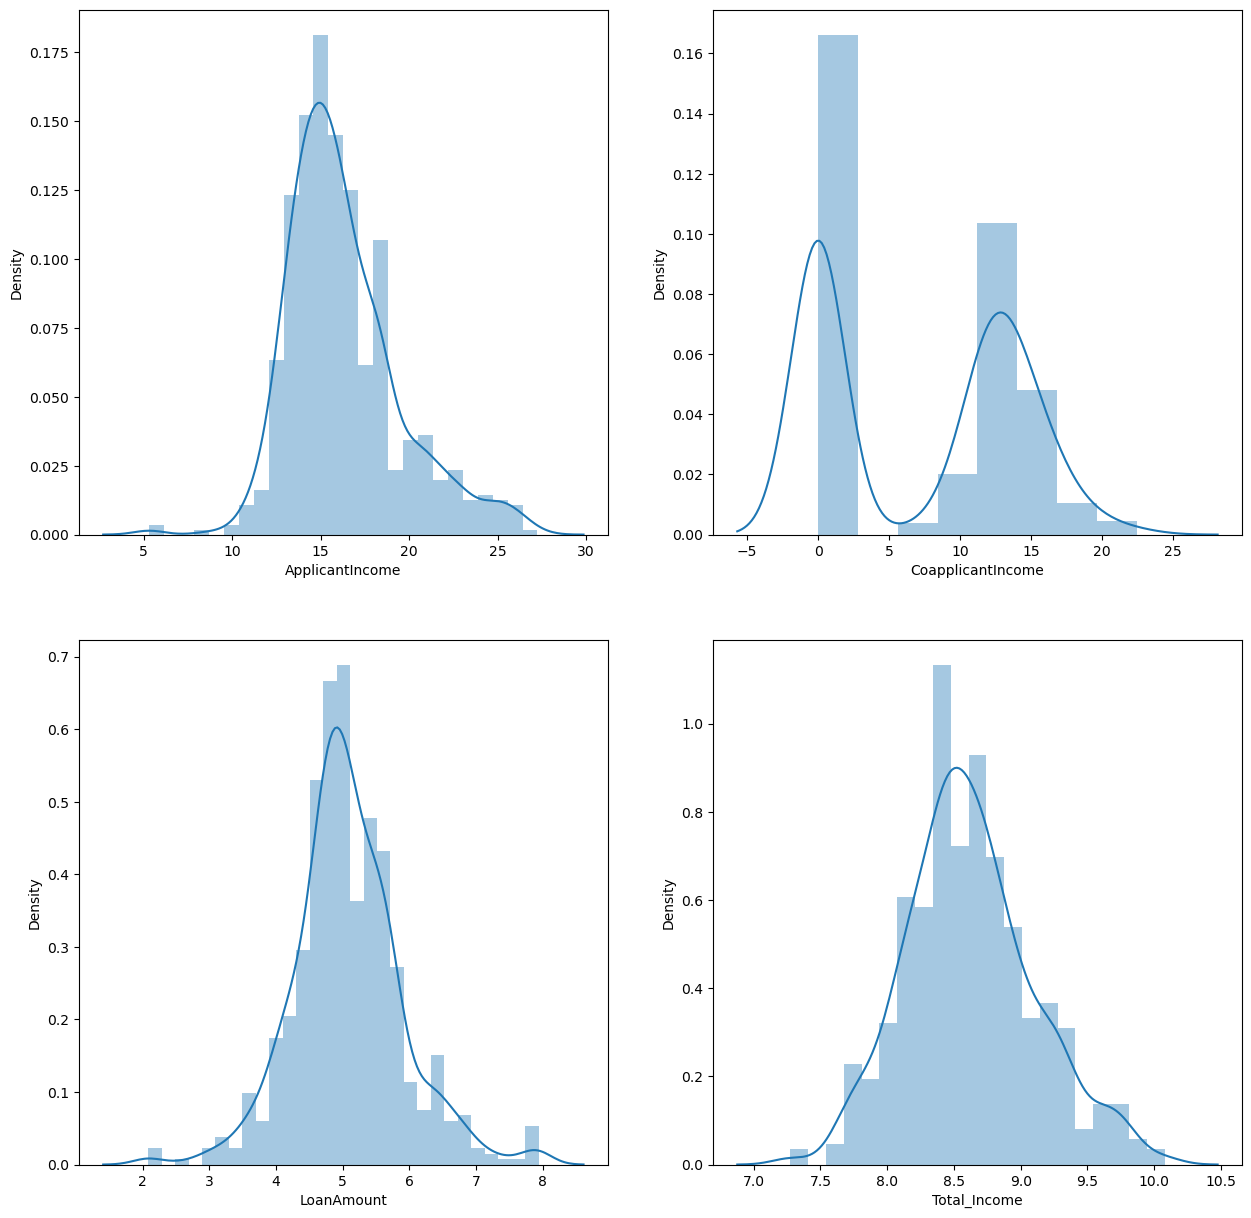

In [34]:
plt.figure(figsize=(15, 15))
for i,var in enumerate(numdata):
    plt.subplot(2,2,i+1)
    sns.distplot(os_data[var])

In [35]:
os_data.skew()

Gender              -1.525171
Married             -0.479018
Dependents           1.044465
Education           -1.290447
Self_Employed        2.288986
ApplicantIncome      0.881695
CoapplicantIncome    0.089311
LoanAmount           0.292927
Loan_Amount_Term    -2.054975
Credit_History      -1.386349
Property_Area        0.038189
Total_Income         0.345537
Loan_Status          0.000000
dtype: float64

<Axes: >

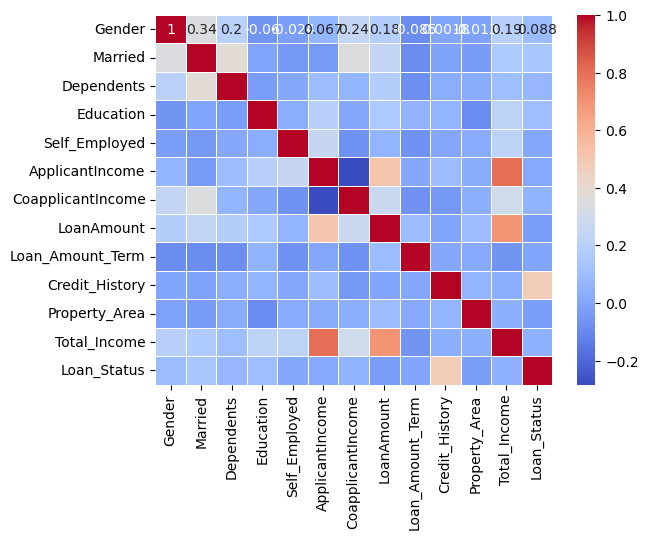

In [36]:
cor=os_data.corr()
sns.heatmap(cor,annot=True,cmap='coolwarm',linewidth=0.5)

# Traning the Model

In [37]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn .model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

In [38]:
y=os_data['Loan_Status']
x=os_data.drop(columns=['Loan_Status'],axis=1)

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [40]:
models={
    'Logistic Regression':LogisticRegression(),
    'Decition Tree':DecisionTreeClassifier(),
    'Random Forest':RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'XGBoost':XGBClassifier(),
    'KNN':KNeighborsClassifier(),
    'SVM':svm.SVC()
}

for model_name, model in models.items():
    # Train the model on the training data
    a=model.fit(x_train, y_train)
    Y_pred = model.predict(x_test)

    report = classification_report(y_test,Y_pred)
    print(f"Classification Report For {model_name}:\n{report}")
    print(f'Confusion Matrix : \n {confusion_matrix(y_test, Y_pred)}')

    print("-"*50)

C:\Users\AM\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report For Logistic Regression:
              precision    recall  f1-score   support

           0       0.75      0.60      0.66        89
           1       0.61      0.76      0.68        75

    accuracy                           0.67       164
   macro avg       0.68      0.68      0.67       164
weighted avg       0.69      0.67      0.67       164

Confusion Matrix : 
 [[53 36]
 [18 57]]
--------------------------------------------------
Classification Report For Decition Tree:
              precision    recall  f1-score   support

           0       0.76      0.93      0.84        89
           1       0.89      0.65      0.75        75

    accuracy                           0.80       164
   macro avg       0.83      0.79      0.80       164
weighted avg       0.82      0.80      0.80       164

Confusion Matrix : 
 [[83  6]
 [26 49]]
--------------------------------------------------
Classification Report For Random Forest:
              precision    recall  

# Feature Selection

In [41]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
rfe=RFE(dtree)
rfe.fit(x,y)

RFE(estimator=DecisionTreeClassifier())

In [42]:
rfe.support_

array([False, False, False, False, False,  True,  True,  True, False,
        True,  True,  True])

In [43]:

rfe_df = pd.DataFrame({"features": list(rfe.support_), "columns": list(x.columns)})
rfe_df

,features,columns
0,False,Gender
1,False,Married
2,False,Dependents
3,False,Education
4,False,Self_Employed
5,True,ApplicantIncome
6,True,CoapplicantIncome
7,True,LoanAmount
8,False,Loan_Amount_Term
9,True,Credit_History


In [44]:
columns_to_drop = rfe_df.loc[rfe_df['features'] == False, 'columns'].tolist()

rfe_drop = os_data.drop(columns=columns_to_drop)
rfe_drop.head(2)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Total_Income,Loan_Status
0,16.610522,11.467457,5.039684,1.0,3,8.714568,0
1,14.422496,0.000000,4.041240,1.0,1,8.006368,1


In [45]:
rfe_drop_x=rfe_drop.drop('Loan_Status', axis=1)
rfe_drop_x.head(2)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Total_Income
0,16.610522,11.467457,5.039684,1.0,3,8.714568
1,14.422496,0.000000,4.041240,1.0,1,8.006368


In [46]:
rfe_drop_y=rfe_drop['Loan_Status']
rfe_drop_y.head(2)

0    0
1    1
Name: Loan_Status, dtype: int64

In [47]:
# Import the train_test_split function from sklearn
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
x_tr_drop, x_te_drop, y_tr_drop, y_te_drop = train_test_split(
    rfe_drop_x,   # Input features
    rfe_drop_y,   # Target variable
    test_size=0.2,
    random_state=101
)

x_tr_drop.shape, x_te_drop.shape, y_tr_drop.shape, y_te_drop.shape

((523, 6), (131, 6), (523,), (131,))

In [48]:
# training model after feature selection
models={
    'Logistic Regression':LogisticRegression(),
    'Decition Tree':DecisionTreeClassifier(),
    'Random Forest':RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'XGBoost':XGBClassifier(),
    'KNN':KNeighborsClassifier(),
    'SVM':svm.SVC()
}

for model_name, model in models.items():
    # Train the model on the training data
    a=model.fit(x_tr_drop, y_tr_drop)
    Y_pred = model.predict(x_te_drop)

    report = classification_report(y_te_drop,Y_pred)
    print(f"Classification Report For {model_name}:\n{report}")
    print(f'Confusion Matrix : \n {confusion_matrix(y_te_drop, Y_pred)}')

    print("-"*50)

Classification Report For Logistic Regression:
              precision    recall  f1-score   support

           0       0.94      0.47      0.62        62
           1       0.67      0.97      0.79        69

    accuracy                           0.73       131
   macro avg       0.80      0.72      0.71       131
weighted avg       0.80      0.73      0.71       131

Confusion Matrix : 
 [[29 33]
 [ 2 67]]
--------------------------------------------------
Classification Report For Decition Tree:
              precision    recall  f1-score   support

           0       0.83      0.92      0.87        62
           1       0.92      0.83      0.87        69

    accuracy                           0.87       131
   macro avg       0.87      0.87      0.87       131
weighted avg       0.88      0.87      0.87       131

Confusion Matrix : 
 [[57  5]
 [12 57]]
--------------------------------------------------
Classification Report For Random Forest:
              precision    recall  

In [49]:
# Real Training the model
lr=RandomForestClassifier()
a=lr.fit(x_tr_drop,y_tr_drop)
y_predi=lr.predict(x_te_drop)

print(classification_report(y_te_drop,y_predi))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91        62
           1       0.94      0.90      0.92        69

    accuracy                           0.92       131
   macro avg       0.92      0.92      0.92       131
weighted avg       0.92      0.92      0.92       131



In [50]:
d=pd.DataFrame(data=y_te_drop)
d['Predicted']=y_predi
d.head(10)

,Loan_Status,Predicted
248,1,1
227,1,1
633,0,0
373,1,1
424,0,0
384,1,1
293,1,1
448,1,1
139,0,0
447,0,0


#  k-fold cross-validation

In [51]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier  # Replace with your specific model
from sklearn.model_selection import KFold, cross_val_score

k = KFold(n_splits = 5)
scores = cross_val_score(RandomForestClassifier(), rfe_drop_x, rfe_drop_y, cv=k, scoring='accuracy')  # Replace x and y with your dataset

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)

# Calculate and print the mean and standard deviation of the scores
mean_accuracy = np.mean(scores)
std_accuracy = np.std(scores)
print("Mean Accuracy:", mean_accuracy)
print("Standard Deviation of Accuracy:", std_accuracy)

Cross-Validation Scores: [0.87022901 0.83969466 0.80916031 0.92366412 1.        ]
Mean Accuracy: 0.8885496183206107
Standard Deviation of Accuracy: 0.06734883969500084


In [52]:
from IPython.display import Markdown

markdown_text = f"""
# Observation:

- The **k-fold cross-validation** results for the RandomForestClassifier model (rf_fs) indicate **consistent and robust performance across multiple folds**. The accuracy scores for each fold are as follows:

    - Fold 1: `{scores[0]*100:.2f}%`
    - Fold 2: `{scores[1]*100:.2f}%`
    - Fold 3: `{scores[2]*100:.2f}%`
    - Fold 4: `{scores[3]*100:.2f}%`
    - Fold 5: `{scores[4]*100:.2f}%`
-----------------
- The **mean accuracy** across all folds is approximately `{mean_accuracy*100:.2f}%`, and the **standard deviation of accuracy** is approximately `{std_accuracy*100:.2f}%`. This suggests that the model maintains a high level of accuracy, with minimal variation, across different subsets of the dataset.
----------------------
- Overall, the RandomForestClassifier (rf_fs) demonstrates stable and reliable performance, making it a **promising choice for classification tasks on this dataset**. 
-----------------------
- The **low standard deviation indicates that the model is not sensitive to variations in the training and testing data splits**, further highlighting its robustness.
"""

# Display the Markdown text using IPython's Markdown function
display(Markdown(markdown_text))


# Observation:

- The **k-fold cross-validation** results for the RandomForestClassifier model (rf_fs) indicate **consistent and robust performance across multiple folds**. The accuracy scores for each fold are as follows:

    - Fold 1: `87.02%`
    - Fold 2: `83.97%`
    - Fold 3: `80.92%`
    - Fold 4: `92.37%`
    - Fold 5: `100.00%`
-----------------
- The **mean accuracy** across all folds is approximately `88.85%`, and the **standard deviation of accuracy** is approximately `6.73%`. This suggests that the model maintains a high level of accuracy, with minimal variation, across different subsets of the dataset.
----------------------
- Overall, the RandomForestClassifier (rf_fs) demonstrates stable and reliable performance, making it a **promising choice for classification tasks on this dataset**. 
-----------------------
- The **low standard deviation indicates that the model is not sensitive to variations in the training and testing data splits**, further highlighting its robustness.
